# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import pandas as pd
import numpy as np
car_data = pd.read_csv('CarPrice_Assignment.csv')

In [2]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [3]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [5]:
#check if there are empty cells, if there are then row and column indexes will be returned where values are empty or missing
np.where(car_data.applymap(lambda x: x ==''))

(array([], dtype=int64), array([], dtype=int64))

In [6]:
car_data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [7]:
# correct the name error in audi 100 ls
car_data.iloc[3,2] = 'audi 100ls'

In [8]:
car_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
car_data.drop(columns=['car_ID'], inplace = True)

In [10]:
# get columns so that we can use the column names for onehot encoding of catagorical featrues in next cell
car_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
# onehot encode all catagorical columns
final_car = pd.get_dummies(car_data, columns=['CarName','symboling','fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem'], drop_first = True)

In [12]:
final_car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [13]:
#check statistical data to see abnormal values and outliers
final_car.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#initialize a seed value so that each time we can get the same random number sequence, it will help us  as a team
# working on a common project to work on the same random data. Each new seed will generate a particular sequnce
#of random number. You can choose any seed value here of your choice
# 0.72 means we have taken 72% values for training set as we will make 72/4 = 18 rows of k fold validation data, where
# value of k will be 4 when we compile and fit our model for validation
np.random.seed(11111)
msk = np.random.rand(len(final_car)) < 0.72
train_total = final_car[msk]
test_total = final_car[~msk]


In [15]:
#check the length of our test and train datasets
print(len(train_total))
print(len(test_total))


141
64


In [16]:
train_total.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,...,0,0,0,0,0,0,0,1,0,0
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,...,0,0,0,0,0,0,0,1,0,0
11,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# check statistical overview if there are some outliers and abnormal values
train_total.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,98.692199,173.658156,65.875887,53.648227,2546.787234,125.666667,3.324184,3.256809,10.070355,103.702128,...,0.0,0.007092,0.028369,0.326241,0.021277,0.092199,0.007092,0.453901,0.035461,0.007092
std,6.005665,12.320089,2.188604,2.508204,529.769152,41.733451,0.266123,0.296387,3.868579,38.424275,...,0.0,0.084215,0.166616,0.470508,0.144819,0.290337,0.084215,0.499645,0.185601,0.084215
min,86.600000,144.600000,61.800000,47.800000,1713.000000,70.000000,2.680000,2.190000,7.000000,55.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.000000,51.600000,2128.000000,97.000000,3.150000,3.150000,8.500000,70.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,96.500000,172.400000,65.400000,53.900000,2410.000000,110.000000,3.310000,3.290000,9.000000,95.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,180.300000,66.600000,55.500000,2952.000000,141.000000,3.580000,3.400000,9.400000,116.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,115.600000,202.600000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
print(train_total.dtypes)

wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
curbweight           int64
                    ...   
fuelsystem_idi       uint8
fuelsystem_mfi       uint8
fuelsystem_mpfi      uint8
fuelsystem_spdi      uint8
fuelsystem_spfi      uint8
Length: 193, dtype: object


In [19]:
# get our price labels and store in another dataframe
train_label = train_total.loc[:,'price']
test_label = test_total.loc[:,'price']

In [20]:
train_label

1      16500.0
2      16500.0
3      13950.0
4      17450.0
5      15250.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 141, dtype: float64

In [21]:
# drop price from oroginal training and test dataset , as price is not needed there
test_data= test_total.drop(columns = ['price'])
train_data= train_total.drop(columns = ['price'])

In [22]:
train_data.shape

(141, 192)

In [23]:
train_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,1,0,0,0,0


In [24]:
#get indices of the columns so that we can know how many columns we have to normalize, as catagorical columns which we
# have added with onehot encoding, do not need to be normalized.. normalizing will be done in next cell
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'wheelbase',
 1: 'carlength',
 2: 'carwidth',
 3: 'carheight',
 4: 'curbweight',
 5: 'enginesize',
 6: 'boreratio',
 7: 'stroke',
 8: 'compressionratio',
 9: 'horsepower',
 10: 'peakrpm',
 11: 'citympg',
 12: 'highwaympg',
 13: 'CarName_alfa-romero Quadrifoglio',
 14: 'CarName_alfa-romero giulia',
 15: 'CarName_alfa-romero stelvio',
 16: 'CarName_audi 100ls',
 17: 'CarName_audi 4000',
 18: 'CarName_audi 5000',
 19: 'CarName_audi 5000s (diesel)',
 20: 'CarName_audi fox',
 21: 'CarName_bmw 320i',
 22: 'CarName_bmw x1',
 23: 'CarName_bmw x3',
 24: 'CarName_bmw x4',
 25: 'CarName_bmw x5',
 26: 'CarName_bmw z4',
 27: 'CarName_buick century',
 28: 'CarName_buick century luxus (sw)',
 29: 'CarName_buick century special',
 30: 'CarName_buick electra 225 custom',
 31: 'CarName_buick opel isuzu deluxe',
 32: 'CarName_buick regal sport coupe (turbo)',
 33: 'CarName_buick skyhawk',
 34: 'CarName_buick skylark',
 35: 'CarName_chevrolet impala',
 36: 'CarName_chevrolet monte carlo',
 37: 'CarNam

In [25]:
## we normalize data because data has big vlaues in decimal and it will worsen performance of our model, may overfit 
## or  we may face hardware resource high usage
# we will apply the formula normalized_train_data = (train_data - mean)/ stadrad_deviation
## firt take mean of training, then subtract mean from each value of the array slice train_data.iloc[:,0:13]
mean = train_data.iloc[:,0:13].mean(axis=0) # taking the mean of 
train_data.iloc[:,0:13] -= mean
std = train_data.iloc[:,0:13].std(axis=0)
train_data.iloc[:,0:13] /= std
test_data.iloc[:,0:13] -= mean
test_data.iloc[:,0:13] /= std



In [26]:
mean

wheelbase             98.692199
carlength            173.658156
carwidth              65.875887
carheight             53.648227
curbweight          2546.787234
enginesize           125.666667
boreratio              3.324184
stroke                 3.256809
compressionratio      10.070355
horsepower           103.702128
peakrpm             5143.971631
citympg               25.113475
highwaympg            30.581560
dtype: float64

In [27]:
std

wheelbase             6.005665
carlength            12.320089
carwidth              2.188604
carheight             2.508204
curbweight          529.769152
enginesize           41.733451
boreratio             0.266123
stroke                0.296387
compressionratio      3.868579
horsepower           38.424275
peakrpm             474.472458
citympg               6.509435
highwaympg            6.734937
dtype: float64

In [28]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label


In [29]:
mean_label

13379.132390070921

In [30]:
std_label

8189.49456801062

In [31]:
print(mean_label)

13379.132390070921


In [32]:
test_label

0      0.014148
10     0.372534
14     1.365880
15     2.122337
18    -1.004718
         ...   
192    0.056886
193   -0.132991
194   -0.053621
196    0.318196
198    0.615529
Name: price, Length: 64, dtype: float64

In [33]:
train_data.shape

(141, 192)

In [190]:
#store in numpy array

In [34]:
test = np.array(test_data.iloc[:]).astype('float32')

In [35]:
train = np.array(train_data.iloc[:]).astype('float32')

In [36]:
test_l= np.array(test_label.astype('float32'))

In [37]:
train_l= np.array(train_label.astype('float32'))

In [38]:
train.shape[1]


192

In [39]:
(141,192)[1]

192

In [40]:
train.dtype

dtype('float32')


# Models section
```
#WE will configure different models here according to relu, tanh , regularization, dropout etc..
```



In [41]:
# we are passing activation function as a parameter here so that we can call this function with tanh or relu while
# fitting and training the model
from keras import models
from keras import layers
def build_model(act):
  model = models.Sequential()
  model.add(layers.Dense(128, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dense(64, activation= act))
  model.add(layers.Dense(32, activation= act))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

Using TensorFlow backend.


In [42]:
build_model('relu').summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               24704     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________


In [43]:
build_model('tanh').summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               24704     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Regularized model
from keras import regularizers
def build_model_regular(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train.shape[1],)))
  model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [45]:
build_model_regular('tanh').summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                1930      
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 7         
Total params: 2,079
Trainable params: 2,079
Non-trainable params: 0
_________________________________________________________________


In [46]:
# dropout model
from keras import regularizers
def build_model_drop(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [47]:
build_model_drop('relu').summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                1930      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                

# K Fold validation section
## here we will use len(train)//k to make 141//4 = 36 rows for validation in each validation test and collect the validation scores for relu , tanh , regularization , and dropout

In [48]:
#k fold validation with relu
# 141/4
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)


processing fold # 0
Instructions for updating:
Use tf.cast instead.
processing fold # 1
processing fold # 2
processing fold # 3


In [49]:
# 141/4
#k fold validation with tanh
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [50]:
#k-fold validtion with regularization
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_regular = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_regular('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_regular.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [51]:
#k-fold validtion with dropout
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_drop = []
for i in range(k):
  print('processing fold #', i)
  val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
  partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_drop('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores_drop.append(val_mae)

processing fold # 0
Epoch 1/100
106/106 [==============================] - 1s 6ms/step - loss: 0.9300 - mae: 0.7100
Epoch 2/100
106/106 [==============================] - 0s 3ms/step - loss: 0.8677 - mae: 0.6869
Epoch 3/100
106/106 [==============================] - 0s 2ms/step - loss: 0.7798 - mae: 0.6441
Epoch 4/100
106/106 [==============================] - 0s 2ms/step - loss: 0.8168 - mae: 0.6556
Epoch 5/100
106/106 [==============================] - 0s 3ms/step - loss: 0.7241 - mae: 0.6388
Epoch 6/100
106/106 [==============================] - 0s 2ms/step - loss: 0.8328 - mae: 0.6453
Epoch 7/100
106/106 [==============================] - 0s 2ms/step - loss: 0.6842 - mae: 0.5562
Epoch 8/100
106/106 [==============================] - 0s 3ms/step - loss: 0.5014 - mae: 0.4856
Epoch 9/100
106/106 [==============================] - 0s 2ms/step - loss: 0.6360 - mae: 0.5144
Epoch 10/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4407 - mae: 0.4390
Epoch 11/100
106/10

106/106 [==============================] - 0s 2ms/step - loss: 0.3337 - mae: 0.3177
Epoch 86/100
106/106 [==============================] - 0s 3ms/step - loss: 0.2153 - mae: 0.2825
Epoch 87/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3603 - mae: 0.3576
Epoch 88/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1137 - mae: 0.2360
Epoch 89/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3135 - mae: 0.2921
Epoch 90/100
106/106 [==============================] - 0s 3ms/step - loss: 0.2151 - mae: 0.2812
Epoch 91/100
106/106 [==============================] - 0s 4ms/step - loss: 0.1990 - mae: 0.2736
Epoch 92/100
106/106 [==============================] - 0s 4ms/step - loss: 0.2044 - mae: 0.2700
Epoch 93/100
106/106 [==============================] - 0s 3ms/step - loss: 0.2034 - mae: 0.2603
Epoch 94/100
106/106 [==============================] - 0s 3ms/step - loss: 0.1954 - mae: 0.2772
Epoch 95/100
106/106 [=====================

106/106 [==============================] - 0s 2ms/step - loss: 0.2383 - mae: 0.2865
Epoch 69/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1244 - mae: 0.2290
Epoch 70/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2132 - mae: 0.2956
Epoch 71/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1662 - mae: 0.2979
Epoch 72/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2240 - mae: 0.2993
Epoch 73/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2415 - mae: 0.3104
Epoch 74/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1532 - mae: 0.2754
Epoch 75/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2413 - mae: 0.2868
Epoch 76/100
106/106 [==============================] - 0s 3ms/step - loss: 0.2152 - mae: 0.3219
Epoch 77/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2693 - mae: 0.3000
Epoch 78/100
106/106 [=====================

106/106 [==============================] - 0s 3ms/step - loss: 0.3326 - mae: 0.3317
Epoch 52/100
106/106 [==============================] - 0s 3ms/step - loss: 0.1674 - mae: 0.2643
Epoch 53/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4409 - mae: 0.3633
Epoch 54/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3402 - mae: 0.3150
Epoch 55/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2879 - mae: 0.3014
Epoch 56/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1979 - mae: 0.2730
Epoch 57/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2244 - mae: 0.2636
Epoch 58/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1889 - mae: 0.2736
Epoch 59/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2083 - mae: 0.3011
Epoch 60/100
106/106 [==============================] - 0s 3ms/step - loss: 0.3725 - mae: 0.3400
Epoch 61/100
106/106 [=====================

106/106 [==============================] - 0s 1ms/step - loss: 0.2857 - mae: 0.3673
Epoch 35/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3336 - mae: 0.3475
Epoch 36/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3618 - mae: 0.4063
Epoch 37/100
106/106 [==============================] - 0s 2ms/step - loss: 0.6325 - mae: 0.4412
Epoch 38/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3310 - mae: 0.3621
Epoch 39/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3290 - mae: 0.3252
Epoch 40/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2544 - mae: 0.3169
Epoch 41/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2500 - mae: 0.3503
Epoch 42/100
106/106 [==============================] - 0s 3ms/step - loss: 0.3408 - mae: 0.4095
Epoch 43/100
106/106 [==============================] - 0s 3ms/step - loss: 0.3122 - mae: 0.3507
Epoch 44/100
106/106 [=====================

# Scores
## here we will see  MAE mean absolute Error scores of all model which we have saved in the list during each training in above section

In [52]:
all_scores_relu

[0.3250378668308258,
 0.3139422833919525,
 0.3551391363143921,
 0.27839091420173645]

In [53]:
all_scores_tanh

[0.23811449110507965,
 0.3658282458782196,
 0.46401655673980713,
 0.3054964542388916]

In [54]:
all_scores_regular

[0.3457532227039337,
 0.25736817717552185,
 0.307172566652298,
 0.37687864899635315]

In [55]:
all_scores_drop

[0.4615606665611267,
 0.49028316140174866,
 0.3305152952671051,
 0.24458135664463043]

# training on the training data
## here we will call each model separately from Models section and train on the training data and evaluate on the test data

In [56]:

model_tanh = build_model('tanh')
model_tanh.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh.evaluate(test, test_l)

64/64 [==============================] - 0s 2ms/step


In [57]:
model_relu = build_model('relu')
model_relu.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(test, test_l)

64/64 [==============================] - 0s 3ms/step


In [58]:
model_regular = build_model_regular('relu')
model_regular.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regular.evaluate(test, test_l)

64/64 [==============================] - 0s 4ms/step


In [59]:
model_drop = build_model_drop('relu')
model_drop.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_drop.evaluate(test, test_l)

64/64 [==============================] - 0s 4ms/step


# Prediction Section

In [60]:
test_l

array([ 0.01414832,  0.3725343 ,  1.3658801 ,  2.122337  , -1.004718  ,
       -0.7045773 , -0.5886972 , -0.97443527, -0.763189  , -0.52312535,
       -0.05301089, -0.3704908 , -0.5449216 , -0.80397296, -0.5536523 ,
       -0.26059392,  0.6062484 ,  1.4864004 ,  2.5404336 ,  3.367835  ,
       -0.8779702 , -0.09159691,  0.18192424, -0.7802841 , -0.50065756,
       -0.9622245 , -0.6813769 , -0.5409531 ,  0.01463675,  0.12453365,
        0.46643507, -0.1806134 ,  0.2687428 ,  0.4299249 ,  0.45129374,
       -0.07511237,  2.3382235 ,  2.200547  , -0.49870384,  0.20280465,
        0.26019526, -0.68430746, -0.7224051 , -0.65524584, -0.98066276,
       -0.7889537 , -0.7547636 , -0.6888255 , -0.6277716 , -0.4983375 ,
       -0.6020069 , -0.4139611 , -0.22347318, -0.54107517,  0.28217462,
       -0.68430746, -0.6574438 , -0.59638995, -0.01027321,  0.056886  ,
       -0.1329914 , -0.05362143,  0.3181964 ,  0.6155285 ], dtype=float32)

In [61]:
def predict(model, m):
  print(f" the Actual value Price was : {test_l[m]* std_label + mean_label} " )
  return(f" the predicted Price was : {(model.predict(test[m:m+1].reshape(1,test.shape[1]))) * std_label + mean_label} ")

In [62]:
x_tanh = predict(model_tanh,2)
x_tanh

 the Actual value Price was : 24565.000309357747 


' the predicted Price was : [[21714.467]] '

In [63]:
x_relu = predict(model_relu,2)
x_relu

 the Actual value Price was : 24565.000309357747 


' the predicted Price was : [[23232.191]] '

In [64]:
x_regular = predict(model_regular,2)
x_regular

 the Actual value Price was : 24565.000309357747 


' the predicted Price was : [[23619.473]] '

In [65]:
x_drop = predict(model_drop,2)
x_drop

 the Actual value Price was : 24565.000309357747 


' the predicted Price was : [[18624.16]] '

In [66]:
def plot_fn(mod):
  y_true = test_l* std_label + mean_label
  y_pred = mod.predict(test) * std_label + mean_label
  return y_true , y_pred.flatten()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plotting(mod, label):
  y_true, y_pred = plot_fn(mod)
  coef = np.polyfit(y_true,y_pred,1)
  poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
  plt.figure()
  plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
  plt.title(label)
  plt.xlabel('Thousand Dollar True' )
  plt.ylabel('Thousand Dollar Predictions' )
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)

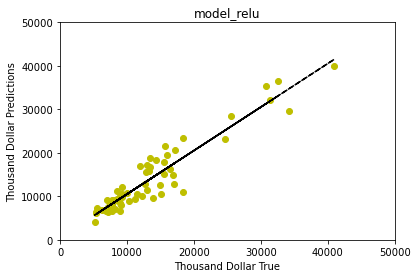

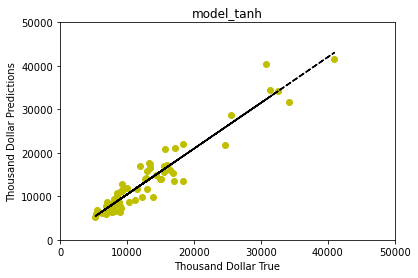

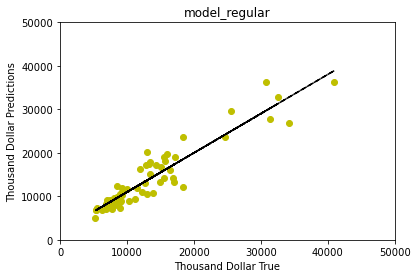

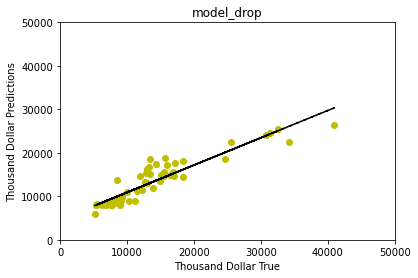

In [68]:
plot_list = []
for i,j in enumerate([model_relu, model_tanh, model_regular, model_drop]):
  list_name = ['model_relu', 'model_tanh', 'model_regular', 'model_drop']
  plot_list.append(plotting(j,list_name[i]))